In [129]:
import pandas as pd

# Load dataset
df = pd.read_csv('unclean_smartwatch_health_data.csv')

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Check for data types
print(df.dtypes)


   User ID  Heart Rate (BPM)  Blood Oxygen Level (%)    Step Count  \
0   4174.0         58.939776               98.809650   5450.390578   
1      NaN               NaN               98.532195    727.601610   
2   1860.0        247.803052               97.052954   2826.521994   
3   2294.0         40.000000               96.894213  13797.338044   
4   2130.0         61.950165               98.583797  15679.067648   

  Sleep Duration (hours) Activity Level Stress Level  
0      7.167235622316564  Highly Active            1  
1      6.538239375570314  Highly_Active            5  
2                  ERROR  Highly Active            5  
3      7.367789630207228          Actve            3  
4                    NaN  Highly_Active            6  
User ID                   201
Heart Rate (BPM)          400
Blood Oxygen Level (%)    300
Step Count                100
Sleep Duration (hours)    150
Activity Level            200
Stress Level              200
dtype: int64
User ID                   

In [131]:
df.describe()

,User ID,Heart Rate (BPM),Blood Oxygen Level (%),Step Count
count,9799.000000,9600.000000,9700.000000,9900.000000
mean,3007.480253,76.035462,97.841581,6985.685885
std,1150.581542,19.412483,1.732863,6885.809680
min,1001.000000,40.000000,90.791208,0.910138
25%,1997.500000,64.890152,96.662683,2021.039657
50%,2998.000000,75.220601,98.010642,4962.534599
75%,4004.000000,85.198249,99.376179,9724.902880
max,4999.000000,296.593970,100.000000,62486.690753


In [133]:
# Replace NaN values with the median for numerical columns
df['Heart Rate (BPM)'] = pd.to_numeric(df['Heart Rate (BPM)'], errors='coerce')
df['Heart Rate (BPM)'] = df['Heart Rate (BPM)'].fillna(df['Heart Rate (BPM)'].median())
df['Blood Oxygen Level (%)'] = df['Blood Oxygen Level (%)'].fillna(df['Blood Oxygen Level (%)'].median())
df['Step Count'] = df['Step Count'].fillna(df['Step Count'].median())
df['Sleep Duration (hours)'] = pd.to_numeric(df['Sleep Duration (hours)'], errors='coerce')
df['Sleep Duration (hours)'] = df['Sleep Duration (hours)'].fillna(df['Sleep Duration (hours)'].median())


# Replace NaN values with the mode for categorical columns
df['Activity Level'] = df['Activity Level'].fillna(df['Activity Level'].mode()[0])
# If you need to use median for 'Stress Level', ensure it's numeric
df['Stress Level'] = pd.to_numeric(df['Stress Level'], errors='coerce')
df['Stress Level'] = df['Stress Level'].fillna(df['Stress Level'].median())


In [138]:
import numpy as np
import pandas as pd

# List of numerical columns to check for outliers
numerical_columns = ['Heart Rate (BPM)', 'Blood Oxygen Level (%)', 'Step Count', 'Sleep Duration (hours)', 'Stress Level']

# Dictionary to store outliers
outliers_dict = {}

for column in numerical_columns:
    Q1 = df[column].quantile(0.25)  # First quartile (25%)
    Q3 = df[column].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile Range

    # Define the outlier range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_dict[column] = outliers  # Store detected outliers

    # Remove outliers from the dataframe
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    print(f"🔹 Outliers detected in '{column}':")
    print(outliers, "\n" + "-"*50 + "\n")

# Print cleaned data
print("✅ Data after removing outliers:")
print(df)


🔹 Outliers detected in 'Heart Rate (BPM)':
      User ID  Heart Rate (BPM)  Blood Oxygen Level (%)   Step Count  \
2      1860.0        247.803052               97.052954  2826.521994   
47     2806.0        118.294933               95.629327   253.743297   
62     3068.0        115.078288               99.928041  1918.372142   
337    2369.0        200.491642               95.441773  2998.761919   
393    2443.0        219.199178               95.497181  1227.804688   
...       ...               ...                     ...          ...   
9654   2898.0        232.128828               96.082553    45.956119   
9665   2069.0        273.862348               96.509094  5002.019249   
9752   4683.0        251.490529               97.371766  5759.938203   
9798   2410.0        115.309686               94.246604  9581.690277   
9934   3399.0        122.776417               97.976204  8588.355250   

      Sleep Duration (hours) Activity Level  Stress Level  
2                   6.503308  Hi

In [141]:
df['Activity Level'] = df['Activity Level'].str.title()  # Capitalize correctly


                        Heart Rate (BPM)  Blood Oxygen Level (%)  Step Count  \
Heart Rate (BPM)                1.000000               -0.003866    0.013359   
Blood Oxygen Level (%)         -0.003866                1.000000   -0.007306   
Step Count                      0.013359               -0.007306    1.000000   
Sleep Duration (hours)         -0.003173               -0.001743   -0.003052   
Stress Level                   -0.003410               -0.008209    0.008016   

                        Sleep Duration (hours)  Stress Level  
Heart Rate (BPM)                     -0.003173     -0.003410  
Blood Oxygen Level (%)               -0.001743     -0.008209  
Step Count                           -0.003052      0.008016  
Sleep Duration (hours)                1.000000      0.007461  
Stress Level                          0.007461      1.000000  


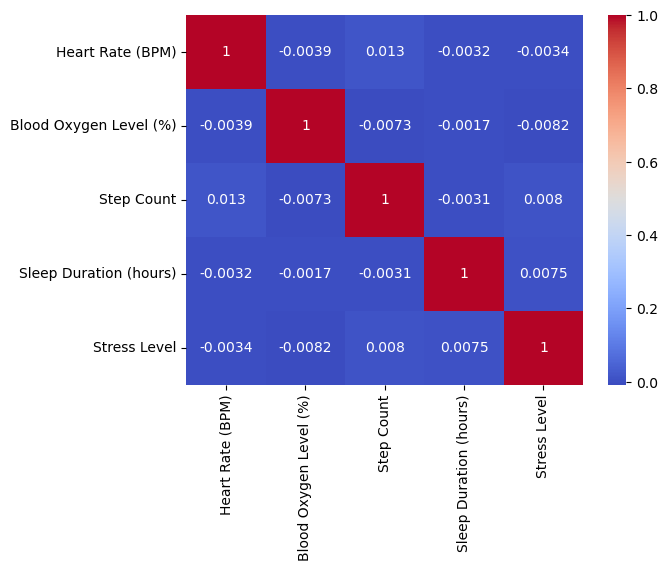

In [143]:
# Compute correlation matrix for numerical features
correlation_matrix = df[['Heart Rate (BPM)', 'Blood Oxygen Level (%)', 'Step Count', 'Sleep Duration (hours)', 'Stress Level']].corr()
print(correlation_matrix)

# Visualize correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


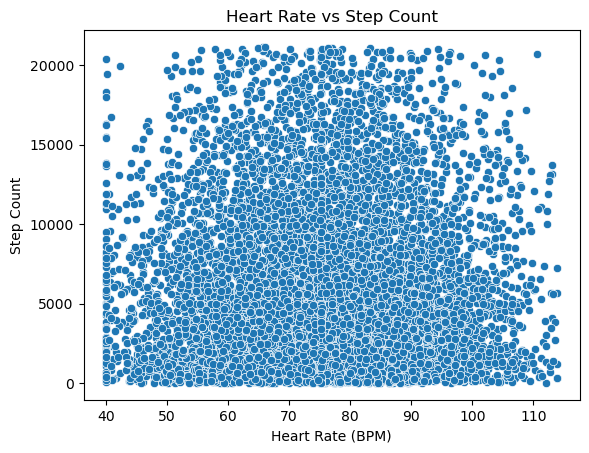

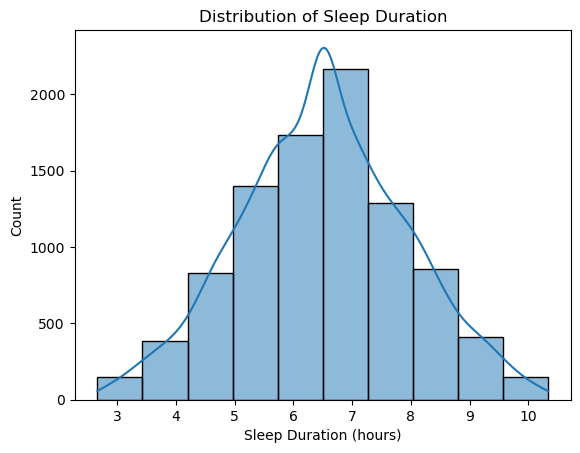

In [145]:
# Scatter plot to check relationship between heart rate and step count
sns.scatterplot(x='Heart Rate (BPM)', y='Step Count', data=df)
plt.title("Heart Rate vs Step Count")
plt.show()

# Histogram of Sleep Duration
sns.histplot(df['Sleep Duration (hours)'], bins=10, kde=True)
plt.title("Distribution of Sleep Duration")
plt.show()


In [147]:
import pandas as pd

def find_non_numeric(series):
    non_numeric_values = []
    for index, value in series.items():
        try:
            float(value)  # Try converting to float
        except (ValueError, TypeError):
            non_numeric_values.append((index, value))
    return non_numeric_values

non_numeric = find_non_numeric(df['Heart Rate (BPM)'])

if non_numeric:
    print("Non-numeric values found:")
    for index, value in non_numeric:
        print(f"Index: {index}, Value: {value}")
else:
    print("No non-numeric values found.")

No non-numeric values found.


In [149]:
print(df['Heart Rate (BPM)'].dtype)

float64


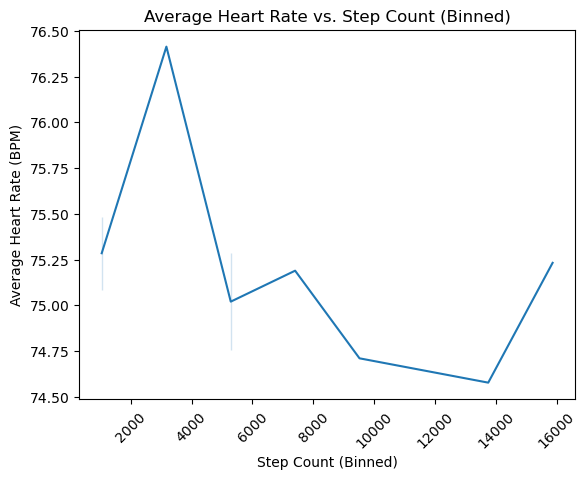

In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to plot Heart Rate vs Step Count using binned data
def plot_heartrate_vs_stepcount_binned(df, bins=10):
    # Create bins for step count
    df['step_bins'] = pd.cut(df['Step Count'], bins=bins)
    
    # Calculate bin midpoints for better visualization
    bin_midpoints = df['step_bins'].apply(lambda x: x.mid).astype(float)

    # Group by bins and compute average heart rate
    binned_data = df.groupby(bin_midpoints)['Heart Rate (BPM)'].mean().reset_index()

    # Plot the line curve
    sns.lineplot(x=bin_midpoints, y=binned_data['Heart Rate (BPM)'])
    plt.xlabel("Step Count (Binned)")
    plt.ylabel("Average Heart Rate (BPM)")
    plt.title("Average Heart Rate vs. Step Count (Binned)")
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.show()

plot_heartrate_vs_stepcount_binned(df)


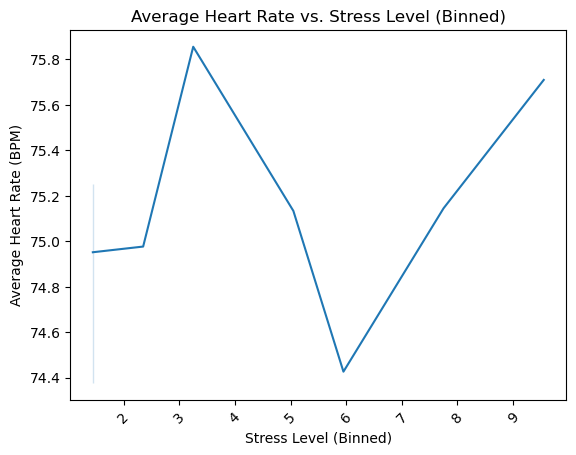

In [153]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to plot Heart Rate vs Stress Level using binned data
def plot_heartrate_vs_stresslevel_binned(df, bins=10):
    # Create bins for stress level
    df['stress_bins'] = pd.cut(df['Stress Level'], bins=bins)

    # Calculate bin midpoints for better visualization
    bin_midpoints = df['stress_bins'].apply(lambda x: x.mid).astype(float)

    # Group by bins and compute average heart rate
    binned_data = df.groupby(bin_midpoints)['Heart Rate (BPM)'].mean().reset_index()

    # Plot the line curve
    sns.lineplot(x=bin_midpoints, y=binned_data['Heart Rate (BPM)'])
    plt.xlabel("Stress Level (Binned)")
    plt.ylabel("Average Heart Rate (BPM)")
    plt.title("Average Heart Rate vs. Stress Level (Binned)")
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.show()

# Example call:
plot_heartrate_vs_stresslevel_binned(df)


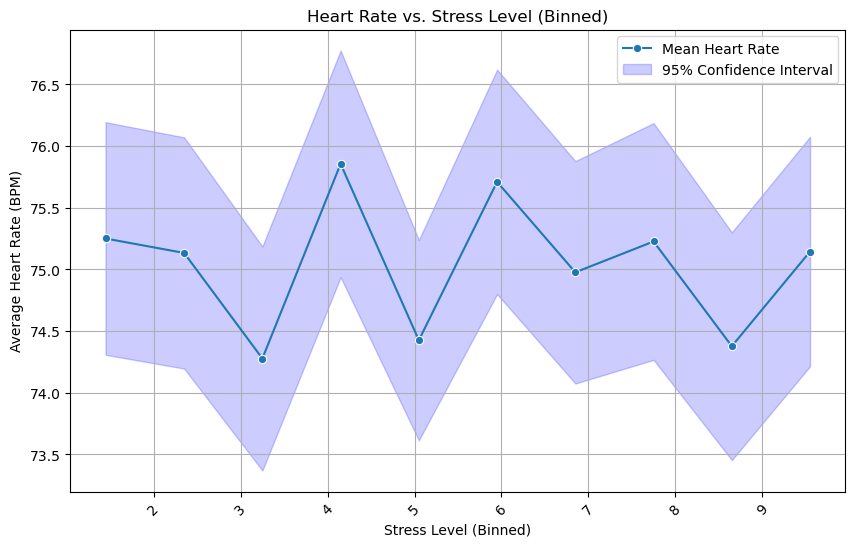

In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_heartrate_vs_stresslevel_binned(df, bins=10):
    # Bin Stress Level into categories
    df['stress_bins'] = pd.cut(df['Stress Level'], bins=bins)

    # Convert bin categories to midpoints for numerical x-axis
    df['stress_midpoints'] = df['stress_bins'].apply(lambda x: x.mid).astype(float)

    # Group by bin midpoints and calculate mean & confidence intervals
    binned_data = df.groupby('stress_midpoints')['Heart Rate (BPM)'].agg(['mean', 'std', 'count']).reset_index()
    
    # Compute standard error (SE) for confidence interval
    binned_data['se'] = binned_data['std'] / np.sqrt(binned_data['count'])

    # Plot with error bars
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=binned_data['stress_midpoints'], y=binned_data['mean'], marker='o', label='Mean Heart Rate')

    # Add confidence interval shading
    plt.fill_between(binned_data['stress_midpoints'], 
                     binned_data['mean'] - 1.96 * binned_data['se'], 
                     binned_data['mean'] + 1.96 * binned_data['se'], 
                     alpha=0.2, color='b', label='95% Confidence Interval')

    plt.xlabel("Stress Level (Binned)")
    plt.ylabel("Average Heart Rate (BPM)")
    plt.title("Heart Rate vs. Stress Level (Binned)")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function
plot_heartrate_vs_stresslevel_binned(df)


C:\Users\abdul\AppData\Local\Temp\ipykernel_6600\488195129.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['stress_bins'], y=df['Heart Rate (BPM)'], palette="coolwarm")


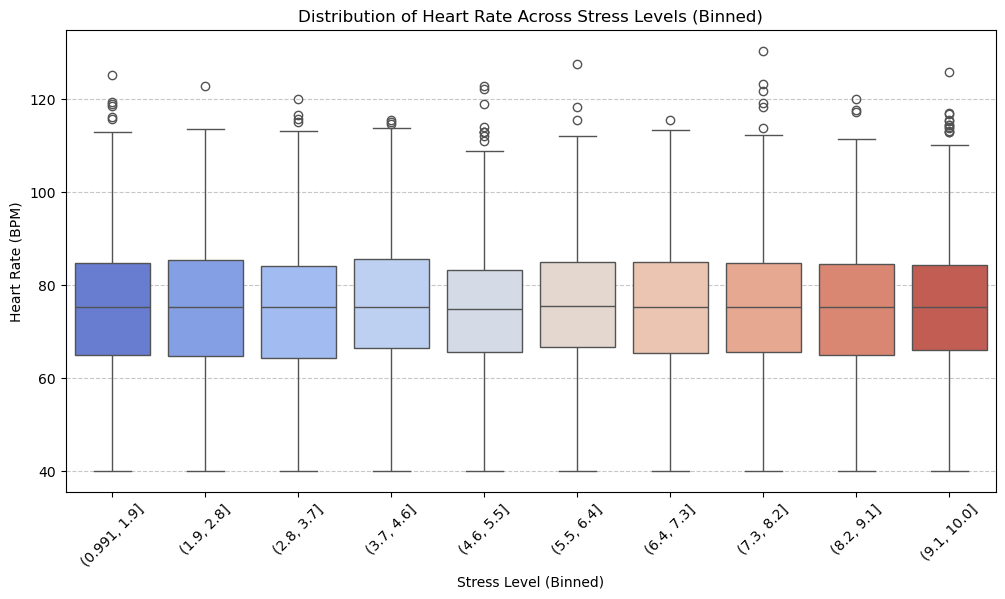

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heartrate_vs_stresslevel_boxplot(df, bins=10):
    # Create bins for Stress Level
    df['stress_bins'] = pd.cut(df['Stress Level'], bins=bins)

    # Plot the Box Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df['stress_bins'], y=df['Heart Rate (BPM)'], palette="coolwarm")

    plt.xlabel("Stress Level (Binned)")
    plt.ylabel("Heart Rate (BPM)")
    plt.title("Distribution of Heart Rate Across Stress Levels (Binned)")
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.show()

# Call the function
plot_heartrate_vs_stresslevel_boxplot(df)
